# Decison Tree using SKLEARN IRIS DATASET

In [1]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
data = pd.read_excel(r'C:\Users\bhavy\OneDrive\Desktop\SEM 3\MACHINE LEARNING\data set\iris dataset.xlsx')

MAPPING OF CLASSES

In [3]:
set_class = set(data['variety'])
val = [i for i in range (len(set_class))]
mapping = dict(zip(set_class,val))
mapping

{'Versicolor': 0, 'Setosa': 1, 'Virginica': 2}

In [4]:
data = data.replace({'variety' : mapping})
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


SPLITTING DATASET

In [5]:
x,y = data.drop('variety' , axis=1) , data['variety']

In [6]:
feature_names = str(x.columns)
feature_names_list = list(x.columns)
labels = str(y.unique())

In [7]:
feature_names , labels

("Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width'], dtype='object')",
 '[1 0 2]')

In [8]:
import sklearn.model_selection as skm
x_train , x_test , y_train , y_test = skm.train_test_split(x,y,test_size = 0.2)

# DECISION TREE CLASSIFIER CRITERION -- GINI

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
clf = DecisionTreeClassifier(max_depth = 3 , criterion = 'gini')

In [11]:
clf.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=3)

DECISION TREE

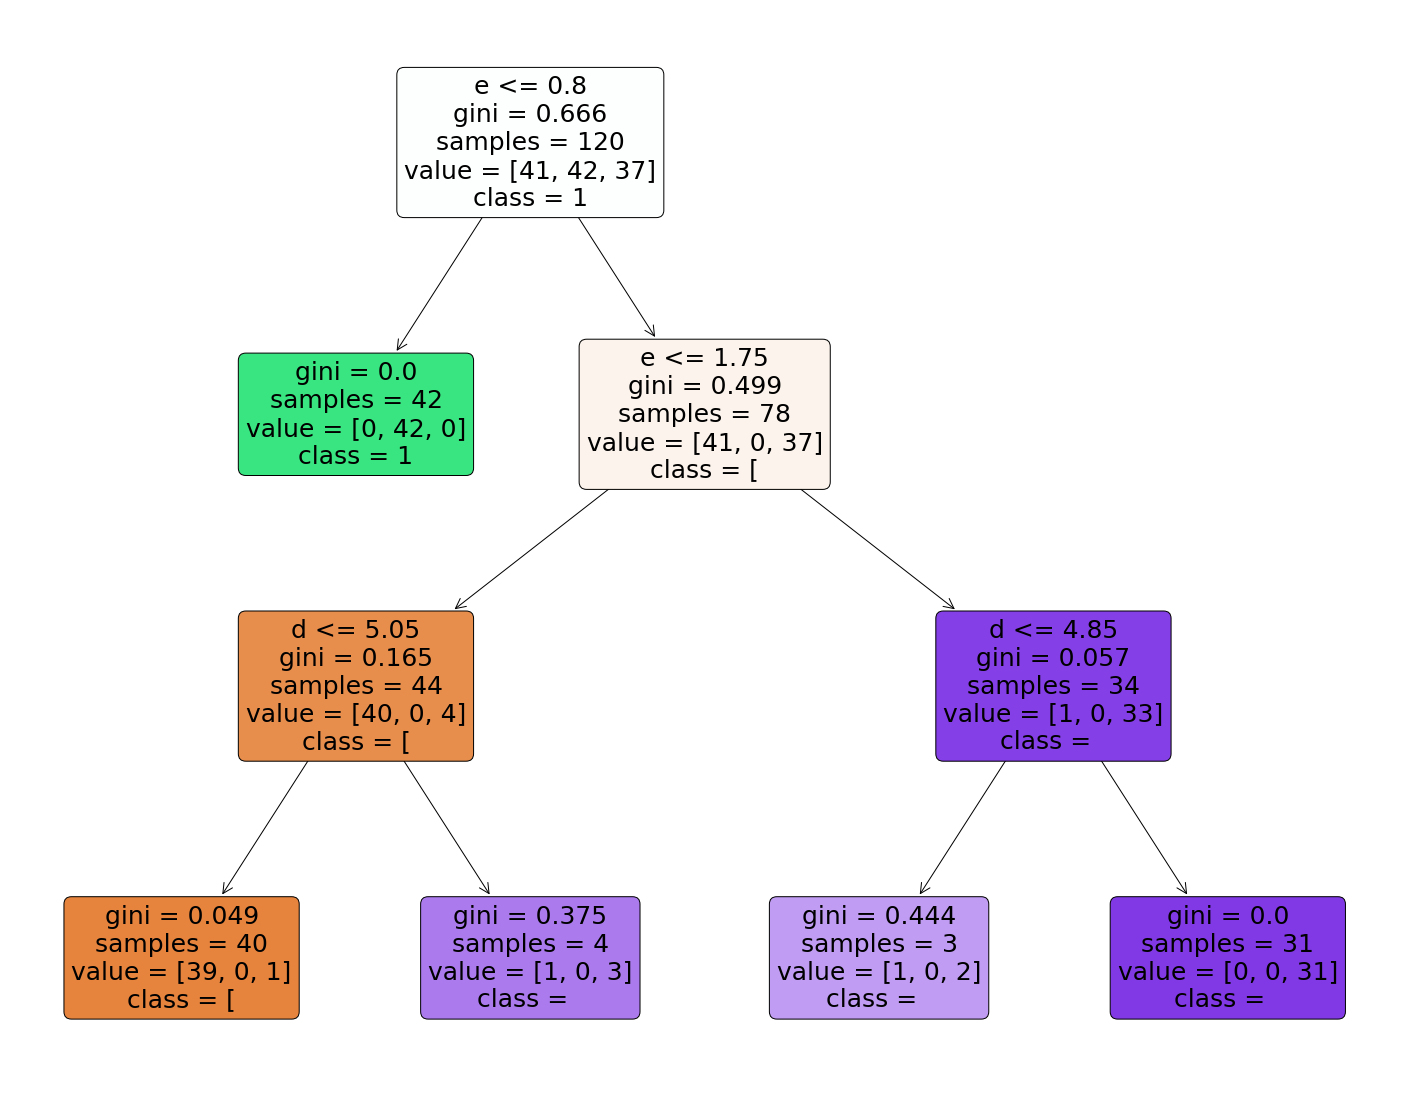

In [12]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize = (25,20) ,  facecolor = 'white')
a = tree.plot_tree(clf ,  feature_names=feature_names , class_names = labels ,rounded = True , filled =  True , fontsize = 25)

In [13]:
# TEXT TREE
from sklearn.tree import export_text
tree_rules = export_text(clf)
print(tree_rules)

|--- feature_3 <= 0.80
|   |--- class: 1
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.05
|   |   |   |--- class: 0
|   |   |--- feature_2 >  5.05
|   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



ACCURACY 

In [14]:
y_pred = clf.predict(x_test)
print(type(y_pred))
y_pred

<class 'numpy.ndarray'>


array([1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 2, 2, 0, 1, 2, 1, 2, 1, 0, 2, 0, 2,
       1, 2, 0, 2, 2, 0, 1, 0], dtype=int64)

In [15]:
clf.score(x_test,y_test) 

0.9666666666666667

In [16]:
for i in range(30):
    print(y_pred[i] == np.array(y_test)[i] , end=',')

True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,

In [17]:
correct = 0
incorrect = 0
for i in range(30):
    if y_pred[i] == np.array(y_test)[i]:
        correct += 1
               
accuracy = (correct/30) * 100
incorrect = 30 - correct

print('correct = ',correct,': incorrect = ', incorrect)
print('Accuracy percentage of the algorithm is = ', accuracy)

correct =  29 : incorrect =  1
Accuracy percentage of the algorithm is =  96.66666666666667


CONFUSION MATRIX

In [18]:
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix

In [19]:
c1 = confusion_matrix(y_test , y_pred)

[Text(0.5, 15.0, 'Predicted Label'),
 Text(24.0, 0.5, 'True Label'),
 Text(0.5, 1.0, 'Confusion Matrix\xa0-\xa0Gini')]

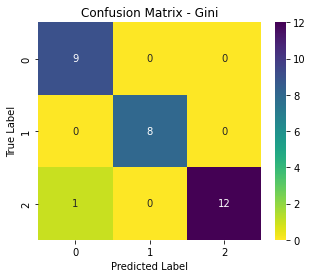

In [20]:
import matplotlib.pyplot as plt
import seaborn as s
plt.figure(figsize = (5,4) ,  facecolor = 'white')
a = sns.heatmap(c1 , cmap = 'viridis_r' , annot = True)
a.set(xlabel = 'Predicted Label', ylabel = 'True Label', title = 'Confusion Matrix - Gini')
# matrix = plot_confusion_matrix(clf , x_test , y_test , cmap=plt.cm.Reds)

In [21]:
vertical_array = {} # Helpful in calculating false positive
horizontal_array = {} # Helpful in calculating false negative
for i in range(3):
    vertical_array[i] = confusion_matrix(y_test , y_pred)[:,i]
    #print("Class ",i,vertical_array[i])
    horizontal_array[i] = confusion_matrix(y_test , y_pred)[i,:]
    #print("Class ",i,horizontal_array[i])

In [22]:
true_positive = {}
false_negative = {}
false_positive = {}
for i in range(3):
    true_positive[i] = confusion_matrix(y_test , y_pred)[i,i]
    false_positive[i] = np.sum(vertical_array[i])-true_positive[i]
    false_negative[i]= np.sum(horizontal_array[i])-true_positive[i]

In [23]:
true_positive , false_negative , false_positive

({0: 9, 1: 8, 2: 12}, {0: 0, 1: 0, 2: 1}, {0: 1, 1: 0, 2: 0})

PRECISION (TP/TP+FP)

In [24]:
precision = {}
for i in range(3):
    precision[i] = true_positive[i]/(false_positive[i] + true_positive[i]) 
    print("Precision class ",i,"is ",precision[i])

Precision class  0 is  0.9
Precision class  1 is  1.0
Precision class  2 is  1.0


RECALL (TP/TP+FN)

In [25]:
recall = {}
for i in range(3):
    recall[i] = true_positive[i]/(false_negative[i] + true_positive[i]) 
    print("Recall class ",i,"is ",recall[i])

Recall class  0 is  1.0
Recall class  1 is  1.0
Recall class  2 is  0.9230769230769231


F SCORE (HARMONIC MEAN) 2 x [(Precision x Recall) / (Precision + Recall)]

In [26]:
f_score = {}
for i in range(3):
    f_score[i] = 2 * ((precision[i] * recall[i]) / (precision[i] + recall[i]))
    print("F' class ",i,"is ",f_score[i])

F' class  0 is  0.9473684210526316
F' class  1 is  1.0
F' class  2 is  0.9600000000000001


In [48]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [49]:
pred_prob_1 = clf.predict_proba(x_test)

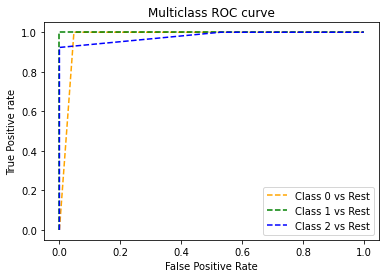

In [50]:
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(3):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_1[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

# DECISION TREE CLASSIFIER CRITERION -- ENTROPY

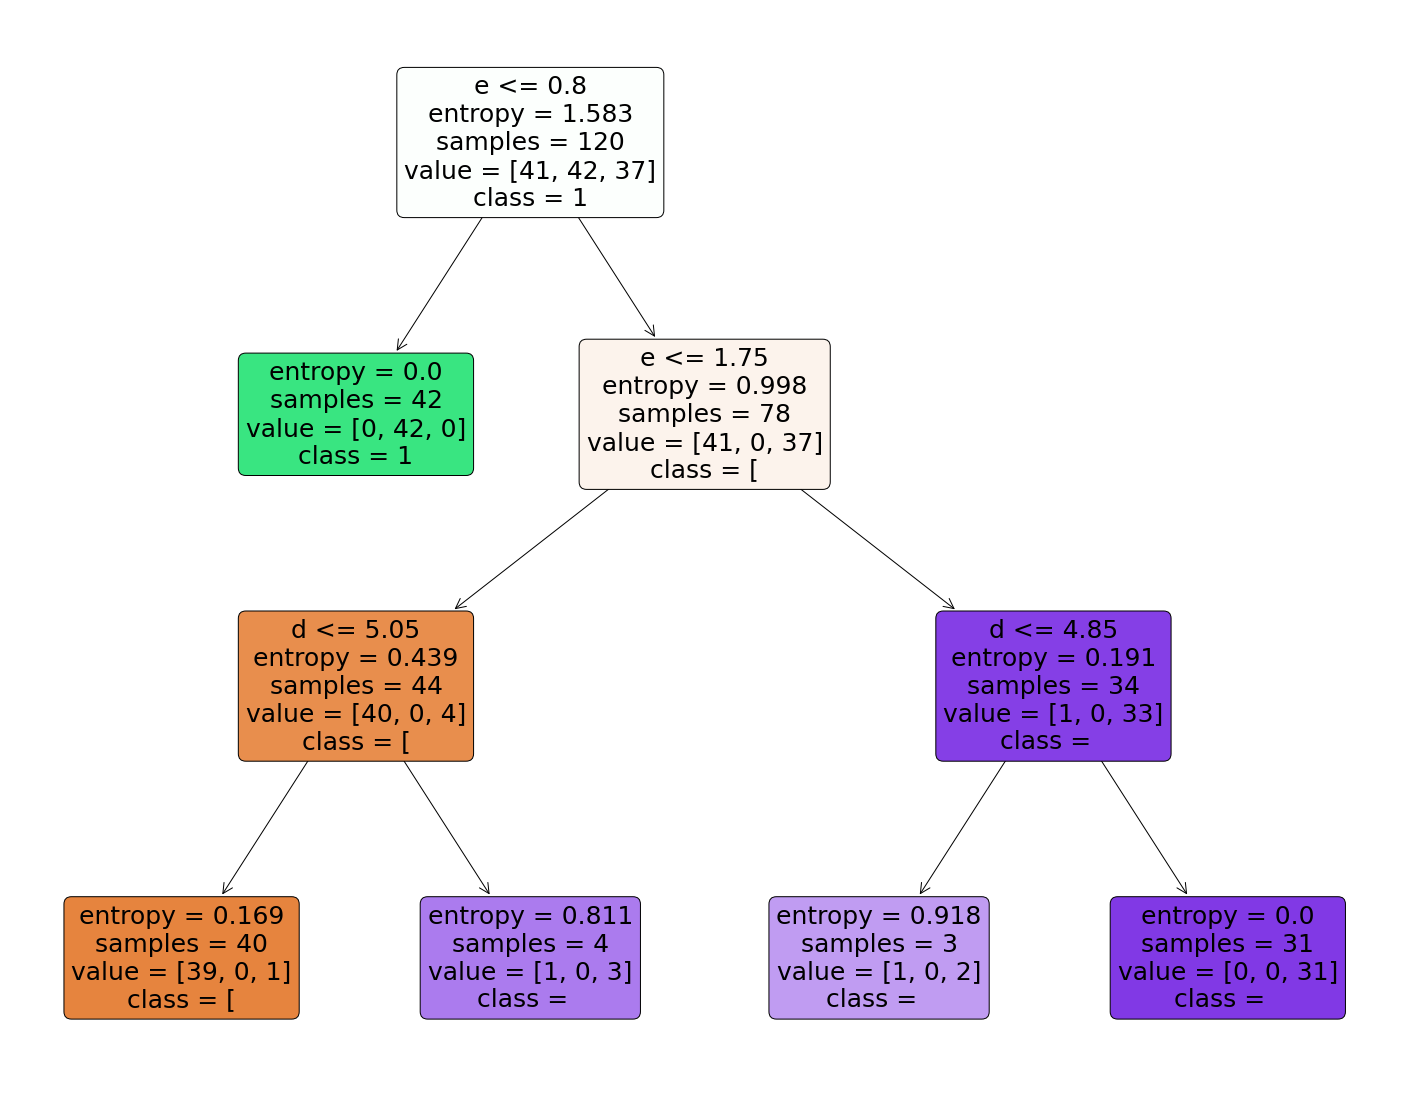

In [27]:
clf1 = DecisionTreeClassifier(max_depth = 3 , criterion = 'entropy')
clf1.fit(x_train , y_train)
plt.figure(figsize = (25,20) ,  facecolor = 'white')
b = tree.plot_tree(clf1 ,  feature_names=feature_names , class_names = labels ,rounded = True , filled =  True , fontsize = 25)

In [28]:
y_pred1 = clf1.predict(x_test)
print(type(y_pred1))
y_pred1

<class 'numpy.ndarray'>


array([1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 2, 2, 0, 1, 2, 1, 2, 1, 0, 2, 0, 2,
       1, 2, 0, 2, 2, 0, 1, 0], dtype=int64)

ACCURACY

In [29]:
clf1.score(x_test,y_test) 

0.9666666666666667

In [30]:
correct1 = 0
incorrect1 = 0
for i in range(30):
    if y_pred1[i] == np.array(y_test)[i]:
        correct1 += 1
               
accuracy1 = (correct1/30) * 100
incorrect1 = 30 - correct1

print('correct = ',correct1,': incorrect = ', incorrect1)
print('Accuracy percentage of the algorithm is = ', accuracy1)

correct =  29 : incorrect =  1
Accuracy percentage of the algorithm is =  96.66666666666667


CONFUSION MATRIX

[Text(0.5, 15.0, 'Predicted Label'),
 Text(24.0, 0.5, 'True Label'),
 Text(0.5, 1.0, 'Confusion Matrix\xa0-\xa0Entropy')]

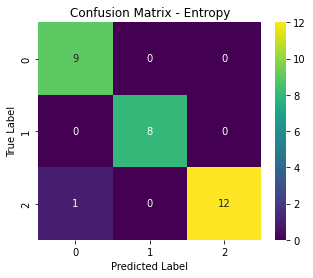

In [31]:
confusion_matrix(y_test , y_pred1)
plt.figure(figsize = (5,4) ,  facecolor = 'white')
c2 = confusion_matrix(y_test , y_pred1)
b = sns.heatmap(c2 , cmap = 'viridis' , annot = True)
b.set(xlabel = 'Predicted Label', ylabel = 'True Label', title = 'Confusion Matrix - Entropy')

In [32]:
vertical_array_entropy = {} # Helpful in calculating false positive
horizontal_array_entropy = {} # Helpful in calculating false negative
for i in range(3):
    vertical_array_entropy[i] = confusion_matrix(y_test , y_pred1)[:,i]
    horizontal_array_entropy[i] = confusion_matrix(y_test , y_pred1)[i,:]

In [33]:
true_positive_entropy  = {}
false_negative_entropy = {}
false_positive_entropy = {}
for i in range(3):
    true_positive_entropy[i] = confusion_matrix(y_test , y_pred1)[i,i]
    false_positive_entropy[i] = np.sum(vertical_array_entropy[i])-true_positive_entropy[i]
    false_negative_entropy[i]= np.sum(horizontal_array_entropy[i])-true_positive_entropy[i]

PRECISION

In [34]:
precision_entropy = {}
for i in range(3):
    precision_entropy[i] = true_positive_entropy[i]/(false_positive_entropy[i] + true_positive_entropy[i]) 
    print("Precision class ",i,"is ",precision_entropy[i])

Precision class  0 is  0.9
Precision class  1 is  1.0
Precision class  2 is  1.0


RECALL

In [35]:
recall_entropy = {}
for i in range(3):
    recall_entropy[i] = true_positive_entropy[i]/(false_negative_entropy[i] + true_positive_entropy[i]) 
    print("Recall class ",i,"is ",recall_entropy[i])

Recall class  0 is  1.0
Recall class  1 is  1.0
Recall class  2 is  0.9230769230769231


F SCORE

In [36]:
f_score_entropy = {}
for i in range(3):
    f_score_entropy[i] = 2 * ((precision_entropy[i] * recall_entropy[i]) / (precision_entropy[i] + recall_entropy[i]))
    print("F' class ",i,"is ",f_score_entropy[i])

F' class  0 is  0.9473684210526316
F' class  1 is  1.0
F' class  2 is  0.9600000000000001


In [52]:
pred_prob_2 = clf1.predict_proba(x_test)

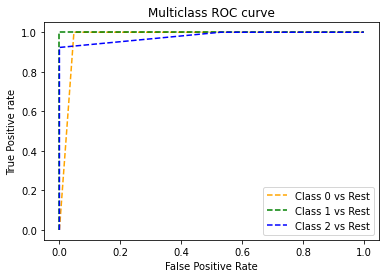

In [53]:
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(3):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_2[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

# DECISION TREE CLASSIFIER CRITERION -- LOG LOSS

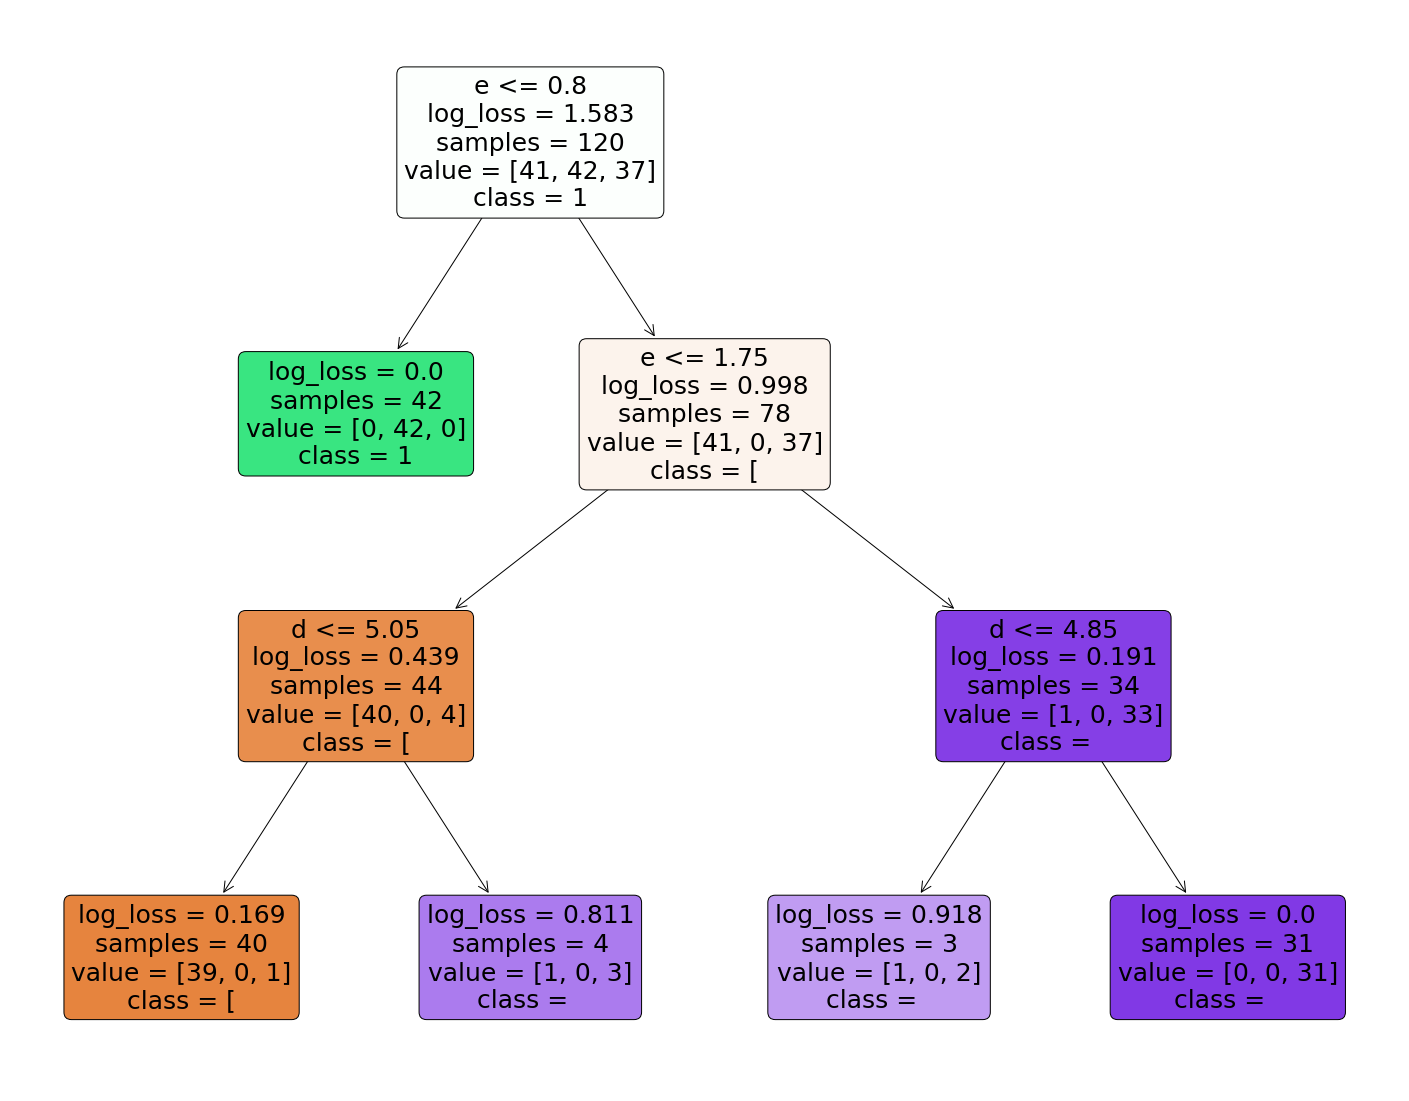

In [37]:
from sklearn.metrics import log_loss
clf2 = DecisionTreeClassifier(max_depth = 3 , criterion = 'log_loss')
clf2.fit(x_train , y_train)
plt.figure(figsize = (25,20) ,  facecolor = 'white')
c = tree.plot_tree(clf2 ,  feature_names=feature_names , class_names = labels ,rounded = True , filled =  True , fontsize = 25)

In [38]:
y_pred2 = clf2.predict(x_test)
print(type(y_pred2))
y_pred2

<class 'numpy.ndarray'>


array([1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 2, 2, 0, 1, 2, 1, 2, 1, 0, 2, 0, 2,
       1, 2, 0, 2, 2, 0, 1, 0], dtype=int64)

ACCURACY

In [39]:
clf2.score(x_test,y_test) 

0.9666666666666667

In [40]:
correct2 = 0
incorrect2 = 0
for i in range(30):
    if y_pred2[i] == np.array(y_test)[i]:
        correct2 += 1
               
accuracy2 = (correct2/30) * 100
incorrect2 = 30 - correct2

print('correct = ',correct2,': incorrect = ', incorrect2)
print('Accuracy percentage of the algorithm is = ', accuracy2)

correct =  29 : incorrect =  1
Accuracy percentage of the algorithm is =  96.66666666666667


CONFUSION MATRIX

[Text(0.5, 15.0, 'Predicted Label'),
 Text(24.0, 0.5, 'True Label'),
 Text(0.5, 1.0, 'Confusion Matrix\xa0-\xa0Log-Loss')]

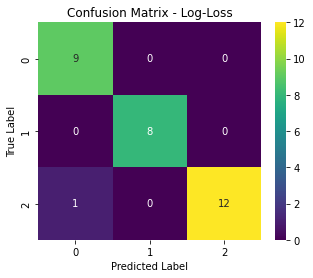

In [41]:
confusion_matrix(y_test , y_pred2)
c3 = confusion_matrix(y_test , y_pred2)
plt.figure(figsize = (5,4) ,  facecolor = 'white')
c = sns.heatmap(c3 , cmap = 'viridis' , annot = True)
c.set(xlabel = 'Predicted Label', ylabel = 'True Label', title = 'Confusion Matrix - Log-Loss')

In [42]:
vertical_array_log = {} # Helpful in calculating false positive
horizontal_array_log = {} # Helpful in calculating false negative
for i in range(3):
    vertical_array_log[i] = confusion_matrix(y_test , y_pred2)[:,i]
    horizontal_array_log[i] = confusion_matrix(y_test , y_pred2)[i,:]

In [43]:
true_positive_log  = {}
false_negative_log = {}
false_positive_log = {}
for i in range(3):
    true_positive_log[i] = confusion_matrix(y_test , y_pred2)[i,i]
    false_positive_log[i] = np.sum(vertical_array_log[i])-true_positive_log[i]
    false_negative_log[i]= np.sum(horizontal_array_log[i])-true_positive_log[i]

PRECISION

In [44]:
precision_log = {}
for i in range(3):
    precision_log[i] = true_positive_log[i]/(false_positive_log[i] + true_positive_log[i]) 
    print("Precision class ",i,"is ",precision_log[i])

Precision class  0 is  0.9
Precision class  1 is  1.0
Precision class  2 is  1.0


RECALL

In [45]:
recall_log = {}
for i in range(3):
    recall_log[i] = true_positive_log[i]/(false_negative_log[i] + true_positive_log[i]) 
    print("Recall class ",i,"is ",recall_log[i])

Recall class  0 is  1.0
Recall class  1 is  1.0
Recall class  2 is  0.9230769230769231


F SCORE

In [46]:
f_score_log = {}
for i in range(3):
    f_score_log[i] = 2 * ((precision_log[i] * recall_log[i]) / (precision_log[i] + recall_log[i]))
    print("F' class ",i,"is ",f_score_log[i])

F' class  0 is  0.9473684210526316
F' class  1 is  1.0
F' class  2 is  0.9600000000000001


In [55]:
pred_prob_3 = clf2.predict_proba(x_test)

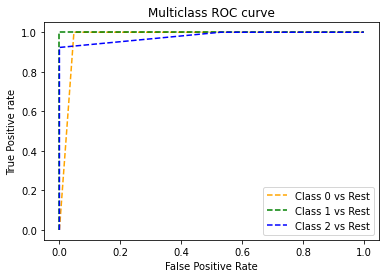

In [56]:
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(3):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_3[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    